# Exploratory Data Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import collections
from PIL import Image

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [8]:
len(train)

25361

In [6]:
statistics = pd.DataFrame(train['Id'].value_counts())

In [23]:
statistics =statistics.drop(['new_whale'])

In [26]:
np.sum(statistics[statistics['Id']>=5]['Id'])

8258

In [22]:
np.sum(statistics['Id']==1)

2073

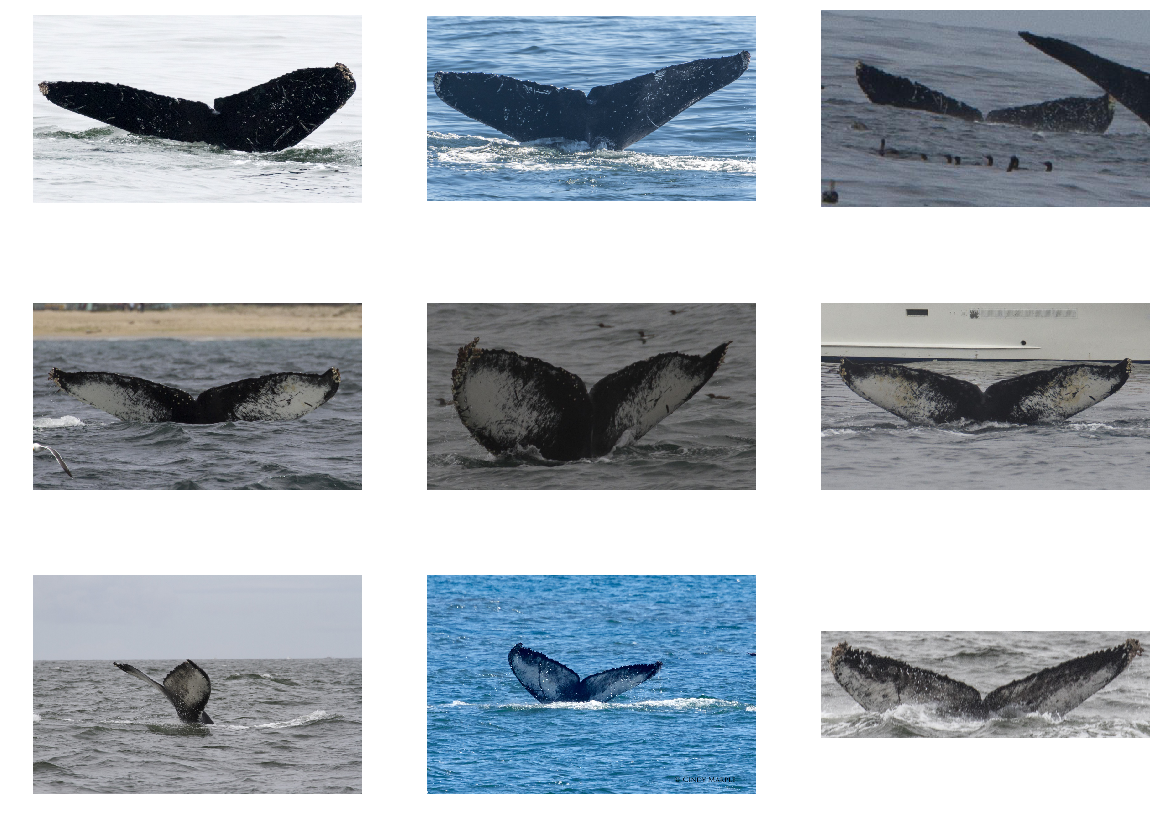

In [18]:
topN=3
top_whales = train['Id'].value_counts().index[3:3+topN]
fig = plt.figure(figsize = (20, 5*topN))
for widx, whale in enumerate(top_whales):
    for idx, img_name in enumerate(train[train['Id'] == whale]['Image'][:3]):
        axes = widx*3 + idx+1
        y = fig.add_subplot(topN, 3, axes)
        img = cv2.imread(os.path.join("train",img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.axis('off')
        y.imshow(img)
plt.savefig("EDA.png")

In [4]:
newwhales = train[train['Id']=="new_whale"]

In [7]:
newwhale_subset = newwhales.iloc[:250,]

In [11]:
newwhale_subset.to_csv("subset_newwhale.csv",index=False)

In [12]:
newwhale_subset.head()

,Image,Id
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale
5,0006e997e.jpg,new_whale
7,000f0f2bf.jpg,new_whale
11,001d7450c.jpg,new_whale
